In [1]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords

import sys
import glob
import os

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd

In [2]:
stop = stopwords.words('english')
stop.append('said')

In [3]:
from nltk.stem.porter import PorterStemmer

In [4]:
tokenizer = RegexpTokenizer(r'\w+')

In [85]:
texts = []
path = '/home/amn34/metis/stuff/noirs/chandler'
for books in sorted(glob.glob(os.path.join(path, '*.txt'))):
    doc = open(books).read()
    doc = doc.decode('utf-8')
    doc = doc.lower()
    docwords = tokenizer.tokenize(doc)
    stopped = [w for w in docwords if not w in stop]
    #p_stem = PorterStemmer()
    #stemmed_words = [p_stem.stem(i) for i in stopped]
    texts.append(stopped)


chandler
chandler
chandler
chandler
chandler
chandler
chandler


In [6]:
for i in texts: print i[0:50], '\n'

[u'eleven', u'clock', u'morning', u'mid', u'october', u'sun', u'shining', u'look', u'hard', u'wet', u'rain', u'clearness', u'foothills', u'wearing', u'powder', u'blue', u'suit', u'dark', u'blue', u'shirt', u'tie', u'display', u'handkerchief', u'black', u'brogues', u'black', u'wool', u'socks', u'dark', u'blue', u'clocks', u'neat', u'clean', u'shaved', u'sober', u'care', u'knew', u'everything', u'well', u'dressed', u'private', u'detective', u'ought', u'calling', u'four', u'million', u'dollars', u'main', u'hallway', u'sternwood'] 

[u'one', u'mixed', u'blocks', u'central', u'avenue', u'blocks', u'yet', u'negro', u'come', u'three', u'chair', u'barber', u'shop', u'agency', u'thought', u'relief', u'barber', u'named', u'dimitrios', u'aleidis', u'might', u'working', u'small', u'matter', u'wife', u'willing', u'spend', u'little', u'money', u'come', u'home', u'never', u'found', u'mrs', u'aleidis', u'never', u'paid', u'money', u'either', u'warm', u'day', u'almost', u'end', u'march', u'stood', u'ou

#### words across corpus

In [7]:
together = [item for sublist in texts for item in sublist]

In [8]:
from nltk import Text

In [9]:
from nltk import FreqDist

In [10]:
books = nltk.Text(together)

In [11]:
import pylab

In [12]:
from nltk.draw import dispersion_plot

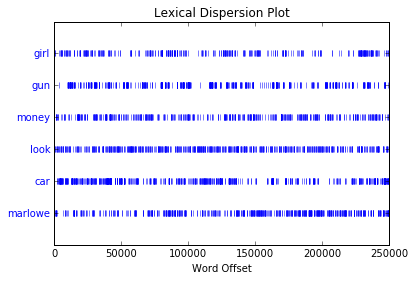

In [13]:
books.dispersion_plot(['girl','gun','money','look','car','marlowe'])

In [14]:
bookwords = [i for i in books]

In [15]:
books.similar('man')

guy girl woman one boy know way never door think back asked slowly
fellow let car hell still good somebody


In [16]:
books.similar('gun')

hand right back card left hat around went cigarette came money away
slowly bottle head girl chair told glass car


In [17]:
books.similar('girl')

man gun way face looked better going case somebody guy got went sister
thing well less surprised finger around game


In [18]:
books.common_contexts(['man','gun'])

little_looked little_back


In [19]:
books.concordance('man')

Displaying 25 of 1402 matches:
hot hard coal black eyes general look man would pay get along thought might gen
 holding seem bother tall thin silver man sixty close little past blue eyes rem
s could skin smooth bright moved like man sound muscles walked slowly across fl
chair wheel chair old obviously dying man watched us come black eyes fire died 
er stood front mr marlowe general old man move speak even nod looked lifelessly
acks legs sat took hat deft scoop old man dragged voice bottom well brandy norr
 brandy beneath may take coat sir hot man blood veins stood peeled coat got han
t automatically cigarette stopped old man caught gesture smiled faintly may smo
dowed comers mouth nice state affairs man indulge vices proxy dryly looking dul
soft wet heat like pall around us old man nodded neck afraid weight head butler
d shut behind jungle sipped drink old man licked lips watching drawing one lip 
orney investigator chief investigator man named bernie ohls called told wanted 
 policeme

In [20]:
books.collocations()

bay city; shook head; eddie mars; last night; los angeles; mrs
murdock; went back; living room; bill chess; mavis weld; miss
fromsett; long time; philip marlowe; thousand dollars; leaned back;
door opened; could see; terry lennox; harlan potter; say anything


In [21]:
books.count('gun')

650

In [22]:
fd = nltk.FreqDist(books)

In [23]:
fd

FreqDist({u'fawn': 27,
          u'raining': 6,
          u'tommyguns': 1,
          u'cussed': 1,
          u'yellow': 115,
          u'narcotic': 7,
          u'four': 200,
          u'gag': 18,
          u'woods': 6,
          u'clotted': 3,
          u'spiders': 3,
          u'knucks': 3,
          u'railing': 34,
          u'towns': 7,
          u'payoff': 4,
          u'looking': 529,
          u'canes': 1,
          u'fiddling': 2,
          u'attracted': 1,
          u'electricity': 2,
          u'chatter': 2,
          u'plowhorse': 1,
          u'unanswered': 1,
          u'sunlit': 1,
          u'originality': 1,
          u'fingernails': 29,
          u'opener': 6,
          u'lord': 2,
          u'immature': 1,
          u'flicking': 6,
          u'meadows': 2,
          u'shaving': 5,
          u'sinking': 1,
          u'swivel': 13,
          u'callin': 1,
          u'magoozium': 1,
          u'dell': 1,
          u'knelt': 2,
          u'anaemic': 1,
          u'forties

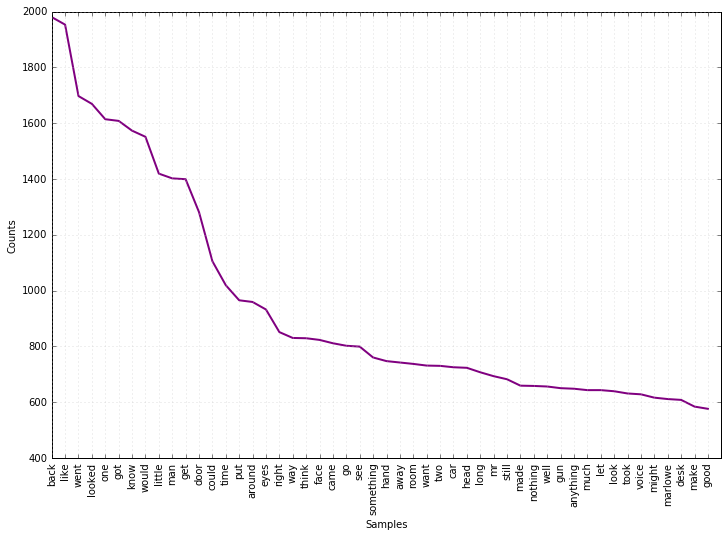

In [24]:
plt.figure(figsize = (12,8))
fd.plot(50,cumulative=False,color='purple')

In [25]:
fd.hapaxes()

[u'tommyguns',
 u'cussed',
 u'prices',
 u'peekin',
 u'increase',
 u'canes',
 u'camarillo',
 u'rupture',
 u'plowhorse',
 u'unanswered',
 u'sunlit',
 u'originality',
 u'clanked',
 u'immature',
 u'sinking',
 u'callin',
 u'dell',
 u'forties',
 u'broiler',
 u'yachting',
 u'dissolutely',
 u'jarringly',
 u'happenings',
 u'festered',
 u'specially',
 u'panther',
 u'shoelaces',
 u'tumed',
 u'shrugging',
 u'milled',
 u'tensely',
 u'unlisted',
 u'medically',
 u'automatics',
 u'9521',
 u'herd',
 u'repotting',
 u'finked',
 u'cult',
 u'confronts',
 u'natured',
 u'skipouts',
 u'uplifting',
 u'climber',
 u'burrow',
 u'_would_',
 u'classification',
 u'scold',
 u'lynne',
 u'shoddy',
 u'ducky',
 u'browse',
 u'42',
 u'swap',
 u'intake',
 u'morally',
 u'grimed',
 u'pompadour',
 u'aloofness',
 u'sweeter',
 u'plunges',
 u'mindedness',
 u'digit',
 u'caution',
 u'rayon',
 u'newscameramen',
 u'hog',
 u'magoozium',
 u'cutback',
 u'backstairs',
 u'canaries',
 u'dignified',
 u'terrycloth',
 u'hoot',
 u'despondent',

In [26]:
books.count('dame')

26

In [27]:
books.count('girl')

397

#### per book

In [28]:
sent = pd.read_pickle('sentiment.pkl')

In [29]:
def chunker(seq, size):
    return (seq[pos:pos + size] for pos in xrange(0, len(seq), size))

In [54]:
woman = [u'she',u'her',u'girl',u'woman',u'blonde']
uniwoman = [unicode(i) for i in woman]

In [90]:
wordcounts=[]
wordprop = []
lengths = []
fds = []
sentscore = []
sentpages = []
womanpages = []

for i in texts:
    lengths.append(len(i))
    book = nltk.Text(i)
    wordcounts.append([book.count('gun'), book.count('girl'), book.count('cigarette')])
    wordprop.append([(book.count('gun')/float(len(i))), (book.count('girl')/float(len(i))),(book.count('cigarette')/float(len(i)))])
    fd = nltk.FreqDist(book)
    fds.append(fd)
    
    #bookwords = [i.encode('utf-8') for i in book]
    bookwords = [i for i in book]
    words = pd.DataFrame(columns=['word'])
    words.word = bookwords
    booksentiment = pd.merge(words, sent, how='left', on='word')
    booksentiment.fillna(0, inplace=True)
    sentscore.append(sum(booksentiment.sentiment))
    
    pagesent = []
    for chunk in chunker(booksentiment,150):
        pagesent.append(sum(chunk.sentiment))
    sentpages.append(pagesent)
    
    pagewoman = []
    for chunk in chunker(bookwords,150):
        womantmp = 0
        for word in chunk:
            if word in uniwoman:
                womantmp+=1
        pagewoman.append(womantmp)
    womanpages.append(pagewoman)

In [71]:
lengths

[31642, 37630, 32703, 33922, 36076, 55034, 22985]

In [72]:
gun = [i[0] for i in wordprop]
girl = [i[1] for i in wordprop]
cig = [i[2] for i in wordprop]

In [73]:
gun

[0.002875924404272802,
 0.0024980069093808134,
 0.004128061645720576,
 0.0028300218147514888,
 0.002300698525335403,
 0.0019442526438201838,
 0.0019142919295192518]

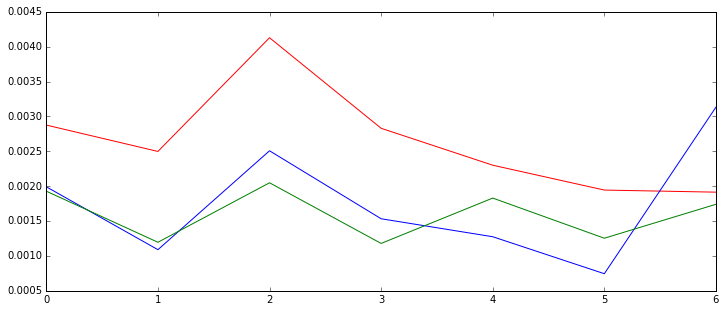

In [75]:
plt.figure(figsize=(12,5))
plt.plot(range(len(gun)),gun,color='r')
plt.plot(range(len(girl)),girl,color='b')
plt.plot(range(len(cig)),cig,color='g')

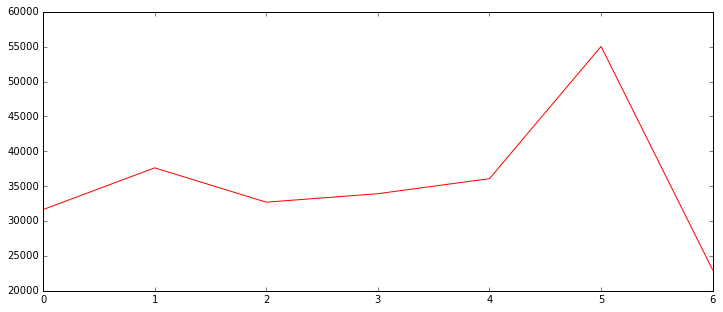

In [76]:
plt.figure(figsize=(12,5))
plt.plot(range(len(lengths)),lengths,color='r')

In [91]:
gunabs = [i[0] for i in wordcounts]
girlabs = [i[1] for i in wordcounts]
cigabs = [i[2] for i in wordcounts]

In [92]:
wordcounts

[[91, 63, 61],
 [94, 41, 45],
 [135, 82, 67],
 [96, 52, 40],
 [83, 46, 66],
 [107, 41, 69],
 [44, 72, 40]]

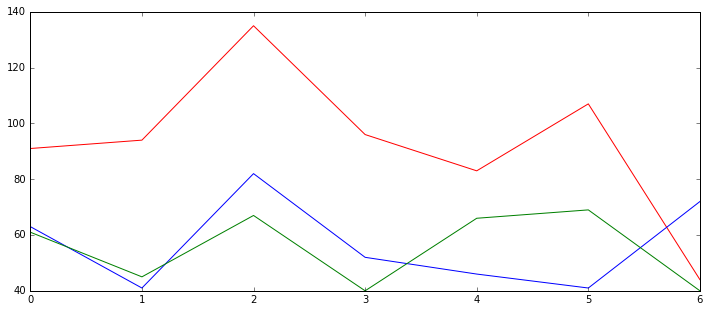

In [93]:
plt.figure(figsize=(12,5))
plt.plot(range(len(gunabs)),gunabs,color='r')
plt.plot(range(len(girlabs)),girlabs,color='b')
plt.plot(range(len(cigabs)),cigabs,color='g')

In [ ]:
plt.figure(figsize=(12,8))
plt.subplot(211)
